## This project was undertaken for AllLife Bank to analyze the performance of a recent marketing campaign targeting liability customers. The campaign achieved a conversion rate of over 9%, and the goal was to provide insights and recommendations to help the marketing team improve future campaigns by identifying potential customers more likely to purchase a loan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID_Customer,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.columns

Index(['ID_Customer', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
df.isnull().sum()

ID_Customer           0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## feature Engineering 
#### I have remore ID_Customer and ZIP_Code columns as a part of feature selection, there is no use of this columns for our analysis

In [7]:
df.drop(['ID_Customer', 'ZIP Code'], axis = 1, inplace = True)

In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [57]:
# 5 Number summary

import plotly.express as ps

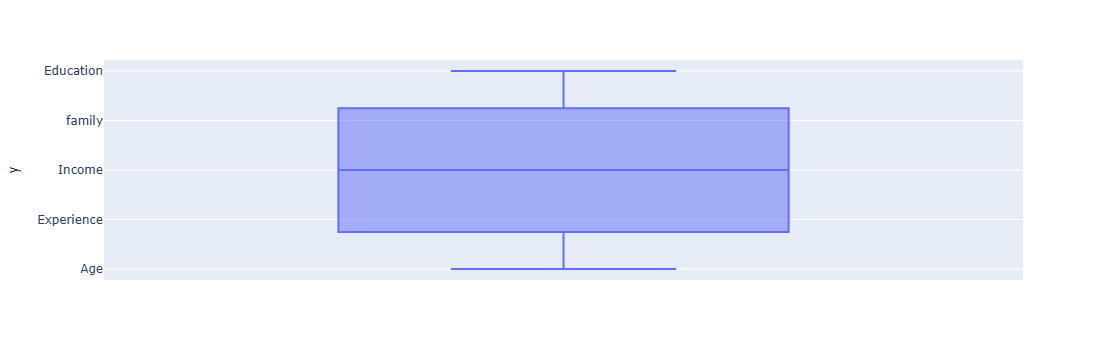

In [134]:
fig = ps.box(df,y = ['Age', 'Experience', 'Income', 'family','Education'])
fig.show()

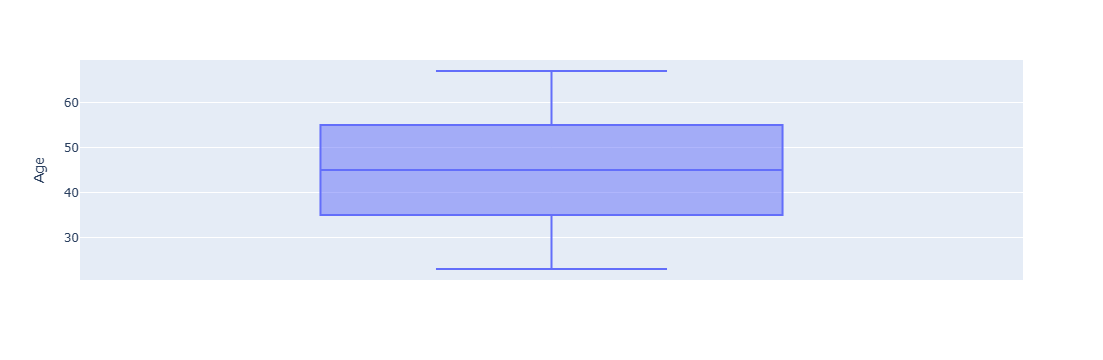

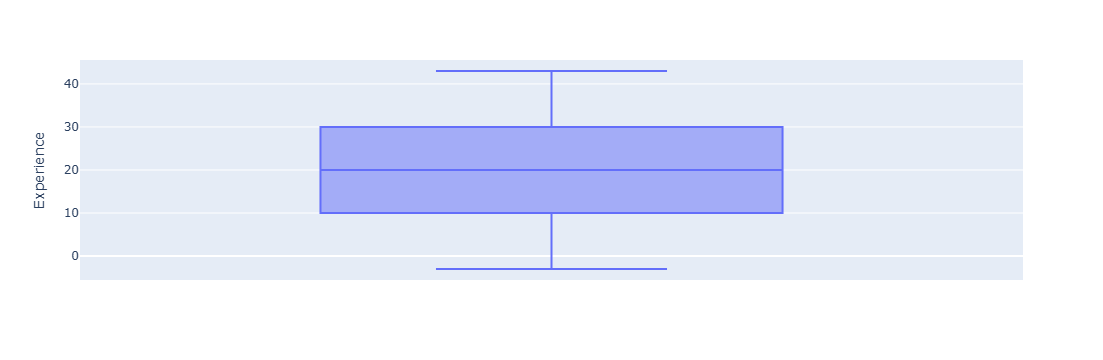

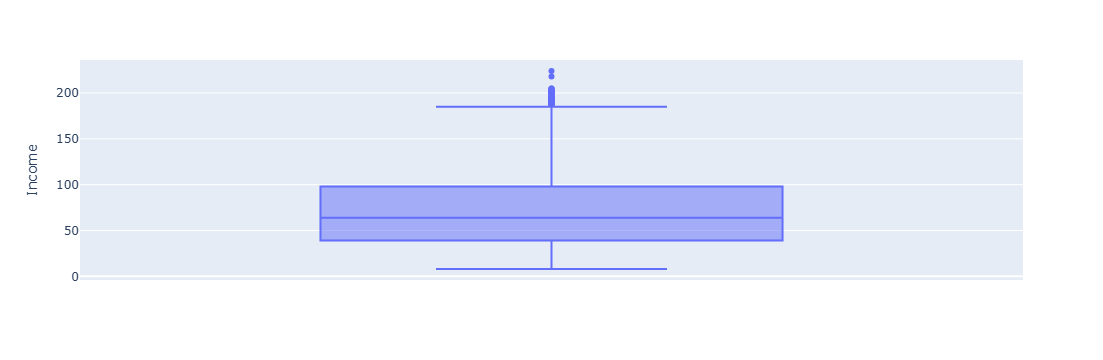

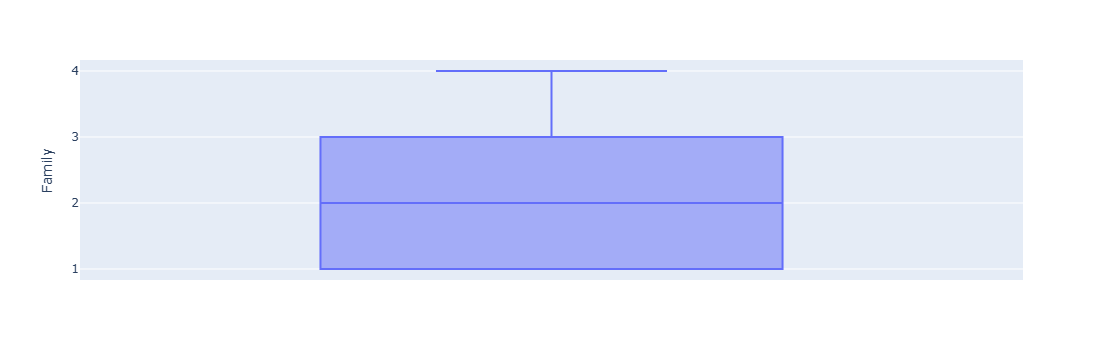

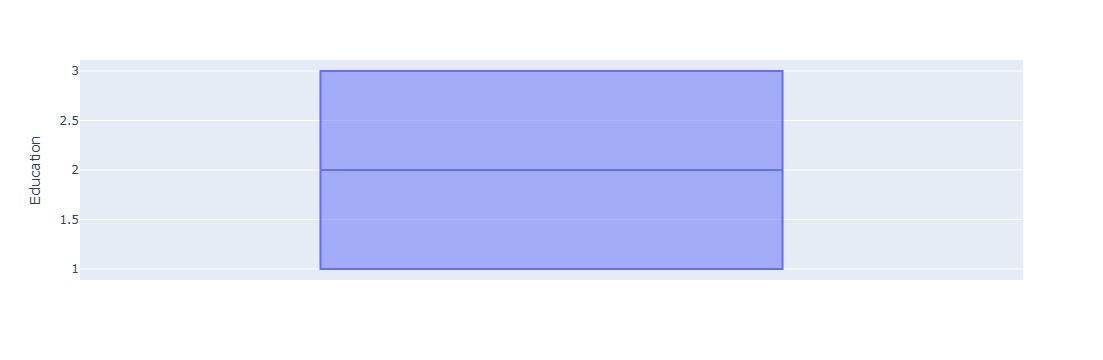

In [135]:
col_name = ['Age', 'Experience', 'Income', 'Family','Education']
for i in col_name:
    fig = ps.box(df,y = i)
    fig.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

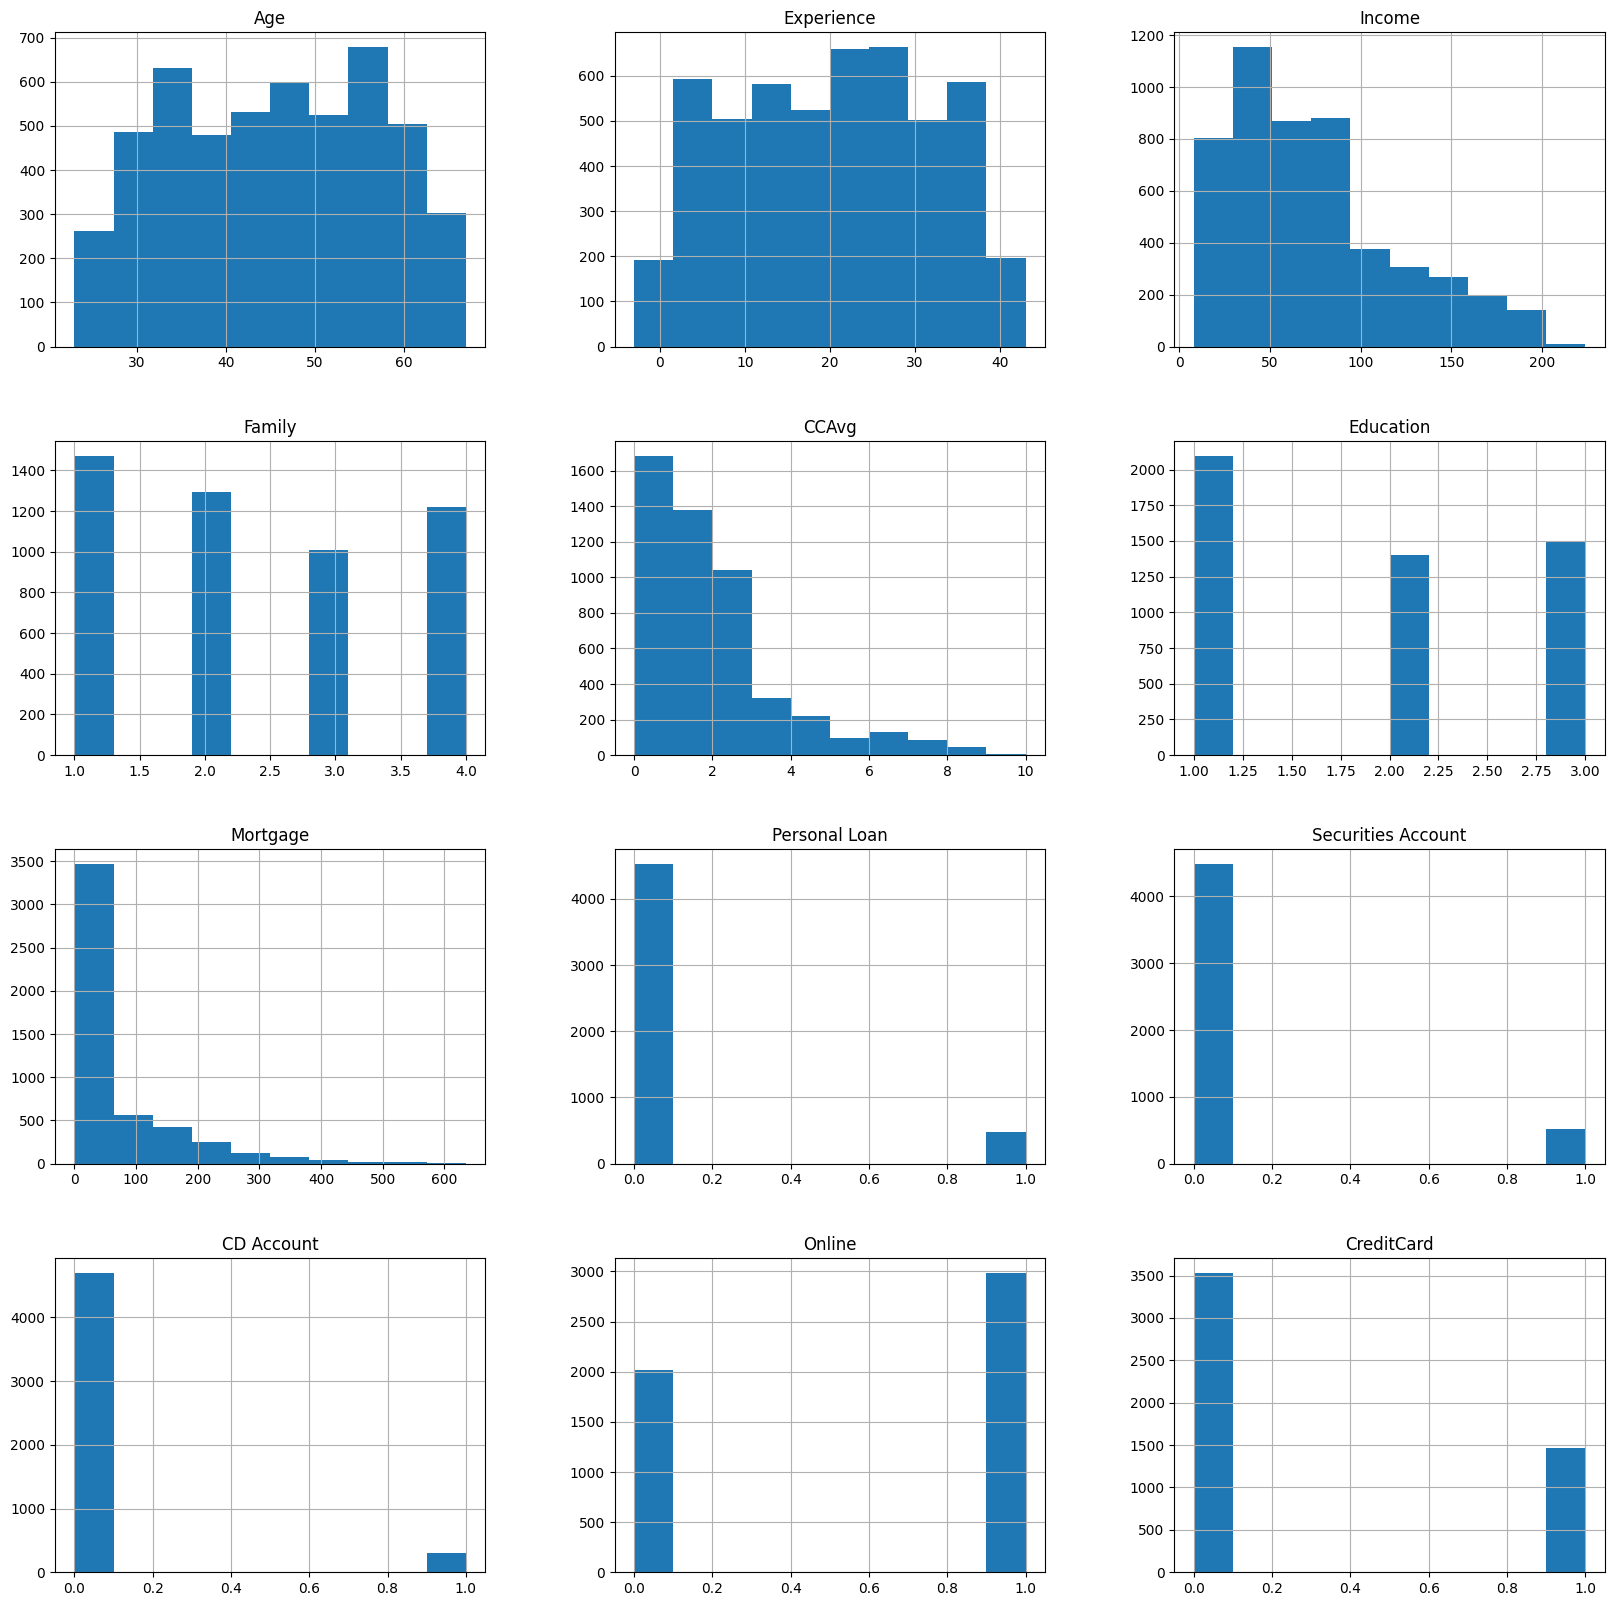

In [10]:
df.hist(figsize = (20,20))

C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4088753809.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

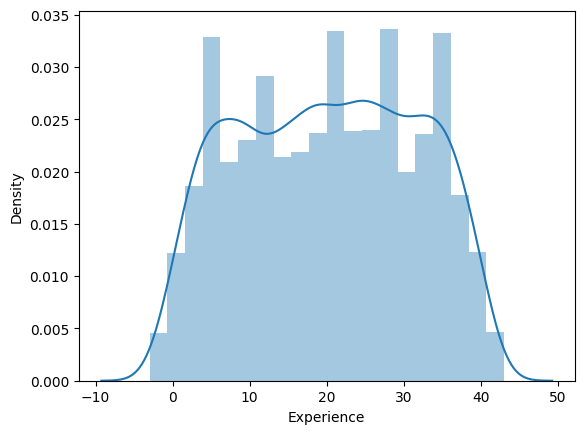

In [12]:
sns.distplot(df['Experience'])

In [14]:
df['Experience'].mean()

np.float64(20.1046)

In [18]:
negative_exp = df[df['Experience']<0]
negative_exp.shape

(52, 12)

C:\Users\dell\AppData\Local\Temp\ipykernel_11204\3268055496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_exp['Age'])


<Axes: xlabel='Age', ylabel='Density'>

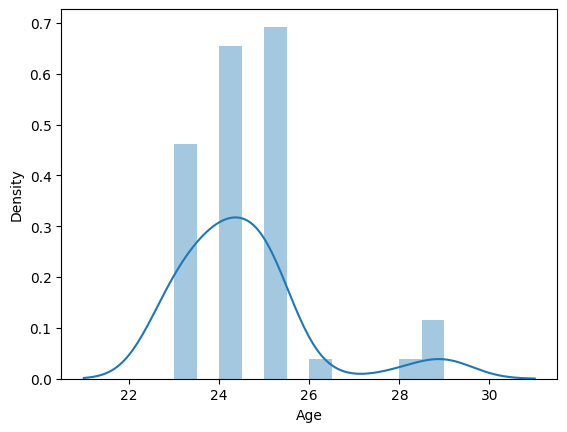

In [20]:
sns.distplot(negative_exp['Age'])

In [23]:
negative_exp['Experience'].mean()

np.float64(-1.4423076923076923)

In [24]:
negative_exp.size

624

In [29]:
print('our negative experience data present in data is {} and {} % '.format(negative_exp.size, (negative_exp.size/df.size)*100))

our negative experience data present in data is 624 and 1.04 % 


In [30]:
data = df.copy()

In [31]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [32]:
data.shape

(5000, 12)

In [33]:
data['Experience'] = np.where(data['Experience']<0,
                              data['Experience'].mean(),
                              data['Experience'])

In [39]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


C:\Users\dell\AppData\Local\Temp\ipykernel_11204\3440899688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

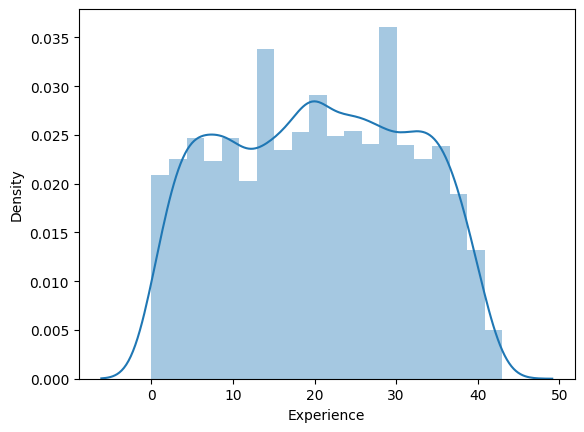

In [36]:
sns.distplot(data['Experience'])

In [41]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

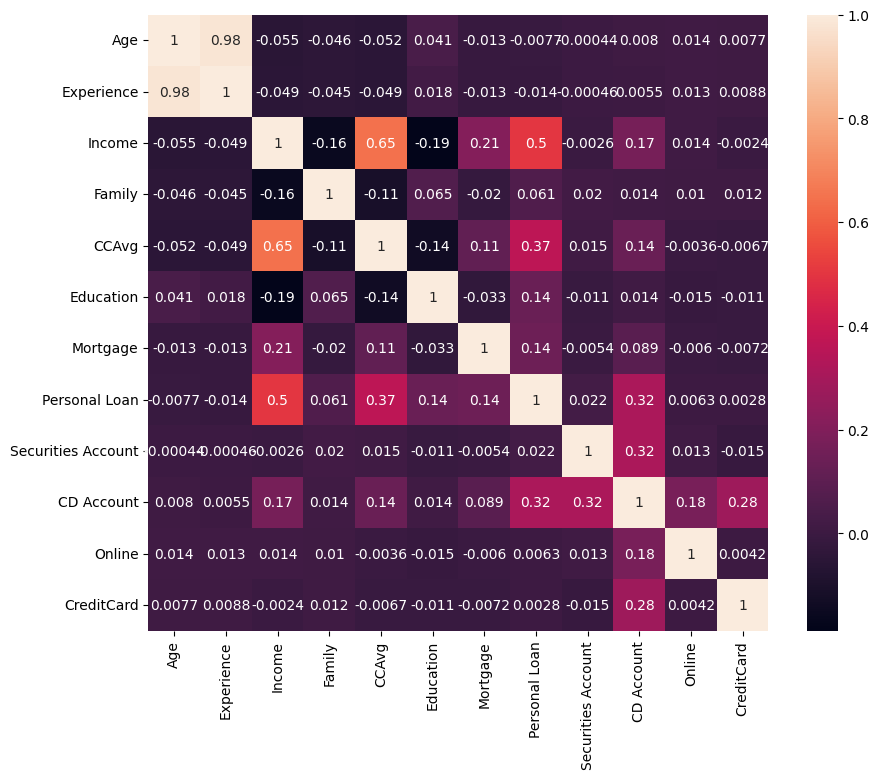

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

In [48]:
data = data.drop(['Experience'], axis = 1)

In [49]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [50]:
data['Education'].unique()

array([1, 2, 3])

In [51]:
def education(x):
    if x==1:
        return 'Undergraduate'
    if x==2:
        return 'Graduate'
    if x==3:
        return 'Professional'
        

In [52]:
data['qualification'] = data['Education'].apply(education)

In [53]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,qualification
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [55]:
qualification_dis = data.groupby('qualification')['Age'].count()


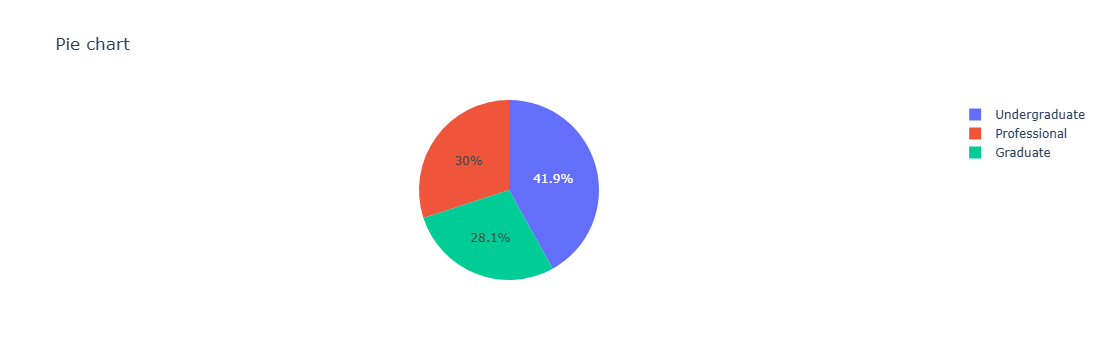

In [79]:
fig = ps.pie(data, values = qualification_dis, names = qualification_dis.index, title = 'Pie chart')
fig.show()

In [61]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,qualification
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [64]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [65]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [67]:
def seq(y):
    if (y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return 'holds Securitie and deposite'
    if (y['Securities Account'] == 0 ) & (y['CD Account'] == 0):
        return 'doesnt hold securities and deposite'

    if (y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return 'holds only deposite'
    if (y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return 'holds only Securitie'

In [69]:
data['Account holder category'] = data.apply(seq, axis = 1)

In [82]:
val = data['Account holder category'].value_counts()
val.index

Index(['doesnt hold securities and deposite', 'holds only Securitie',
       'holds only deposite', 'holds Securitie and deposite'],
      dtype='object', name='Account holder category')

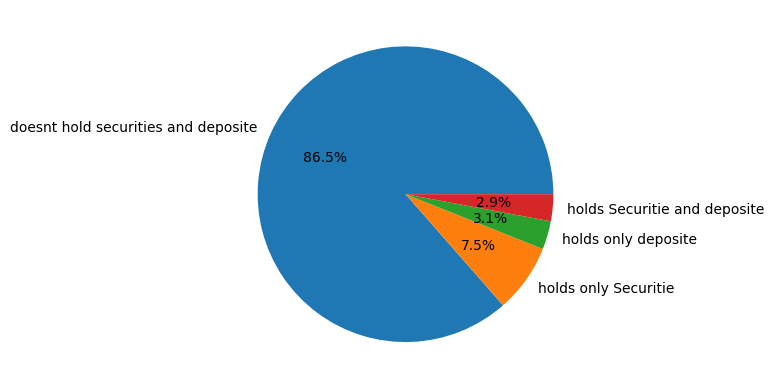

In [96]:
fig = plt.pie(val, labels = val.index, autopct = '%1.1f%%' )
plt.show()

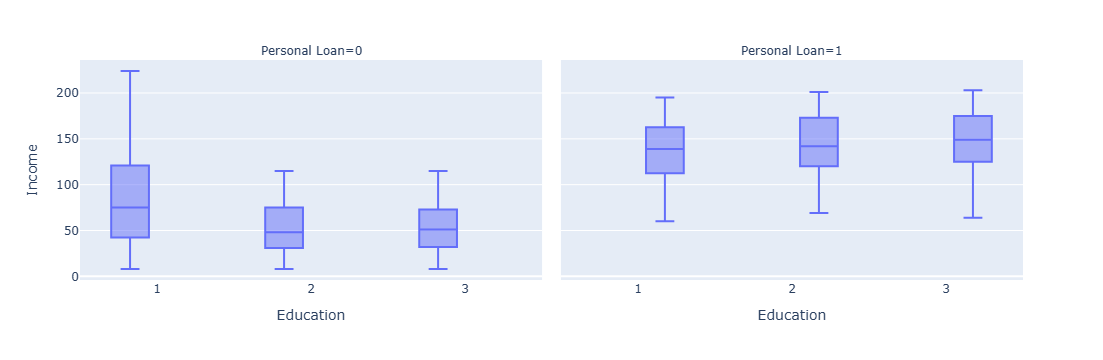

In [97]:
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4136564626.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4136564626.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




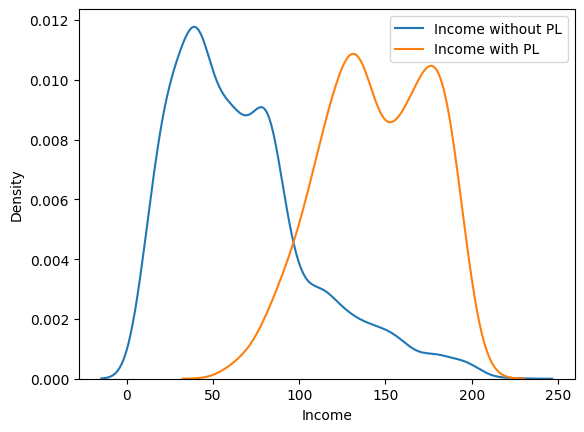

In [102]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False, label = 'Income without PL')
sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False, label = 'Income with PL')
plt.legend()

In [106]:
def plot(col1, col2, label1, label2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False, label = label1)

    sns.distplot(data[data[col2] == 1][col1], hist = False, label = label2)
    plt.legend()
    plt.title(title)

C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4179840344.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4179840344.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




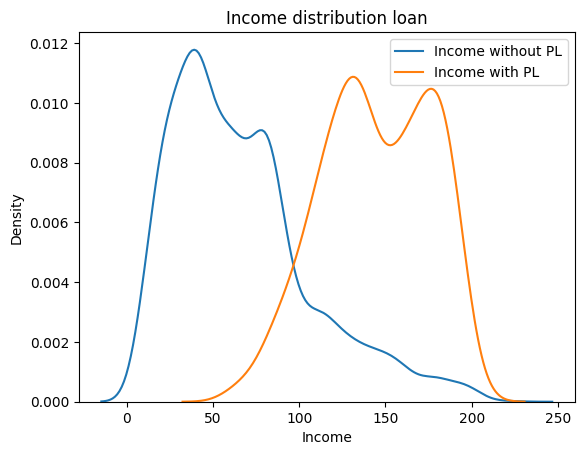

In [107]:
plot('Income', 'Personal Loan', 'Income without PL', 'Income with PL', 'Income distribution loan')

C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4179840344.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_11204\4179840344.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




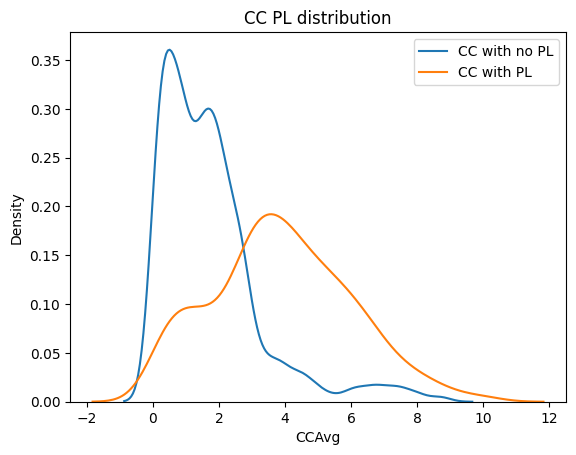

In [108]:
plot('CCAvg', 'Personal Loan', 'CC with no PL', 'CC with PL', 'CC PL distribution')

In [109]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'qualification', 'Account holder category'],
      dtype='object')

In [110]:
col = ['Securities Account','Online',
       'CreditCard', 'Account holder category']

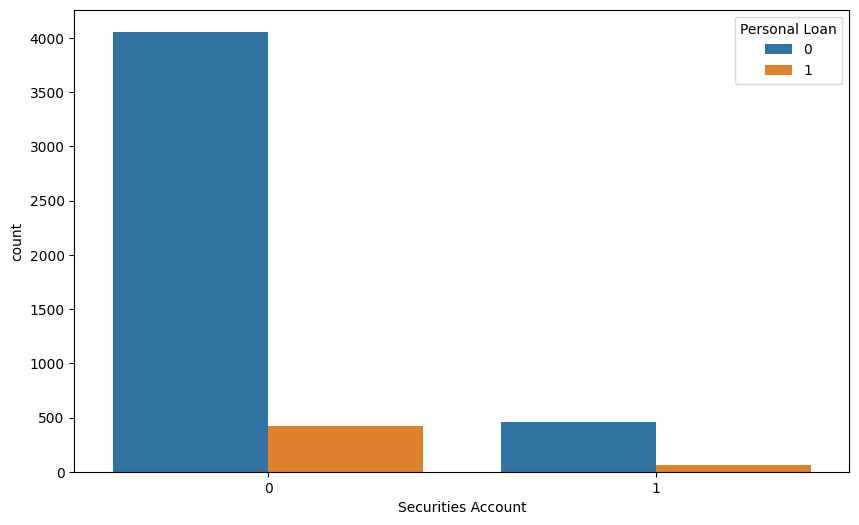

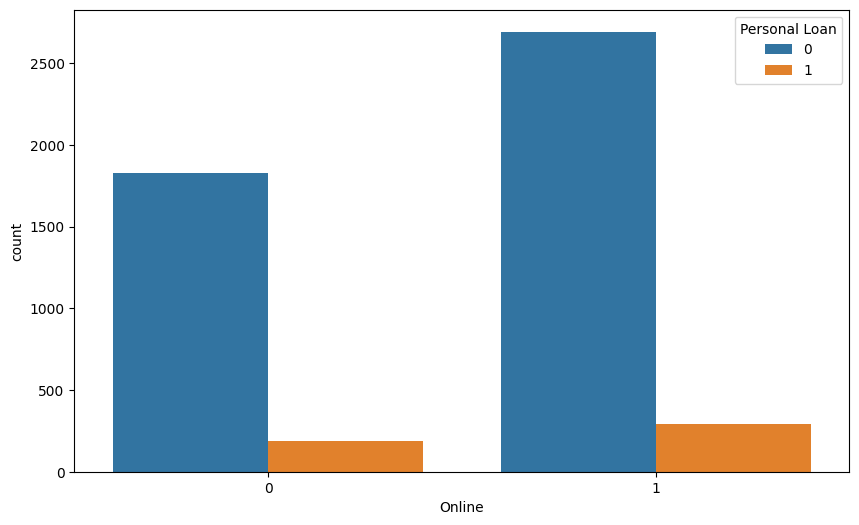

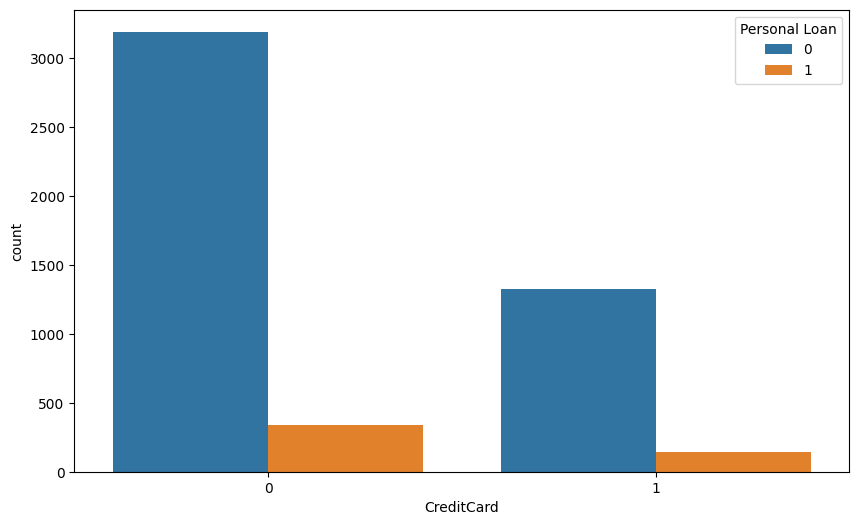

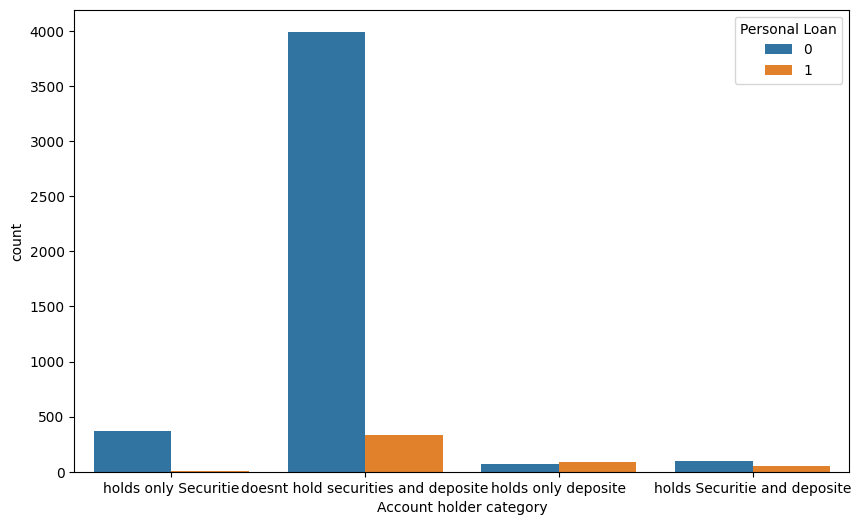

In [113]:
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [130]:
q1 = data.quantile(0.25, numeric_only = True)
q3 = data.quantile(0.75, numeric_only = True)

IQR = q3-q1

print(IQR)


Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [129]:
# log normal trasformation

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1+1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465
